In [103]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('set.csv')
df.head()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


In [104]:
#Count the number of rows and columns in the data set
df.shape


(241, 10)

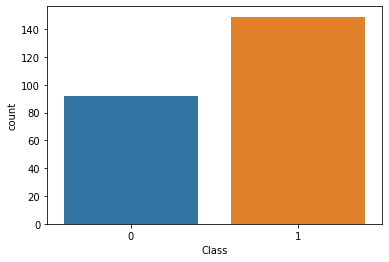

In [105]:
#Visualize this count
sns.countplot(df['Class'],label="Count")

In [106]:
#Look at the data types to see which columns need to be transformed / encoded to a number
df.dtypes

Unnamed: 0               int64
Area                   float64
Perimeter              float64
Convex Area            float64
Solidity               float64
Equivalent Diameter    float64
Major Axis             float64
Minor Axis             float64
Eccentricity            object
Class                    int64
dtype: object

In [107]:
#Get the correlation of the columns
df.corr()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Class
Unnamed: 0,1.000000,-0.084951,-0.205686,-0.095241,-0.271263,-0.248822,-0.110768,-0.033407,-0.841462
Area,-0.084951,1.000000,0.507090,0.906965,0.150100,0.863930,0.402509,0.103028,0.108898
Perimeter,-0.205686,0.507090,1.000000,0.751252,-0.131954,0.727837,0.670185,0.201981,0.249779
Convex Area,-0.095241,0.906965,0.751252,1.000000,0.013181,0.850233,0.548482,0.141966,0.143266
Solidity,-0.271263,0.150100,-0.131954,0.013181,1.000000,0.241274,-0.185935,-0.108843,0.304830
Equivalent Diameter,-0.248822,0.863930,0.727837,0.850233,0.241274,1.000000,0.523142,0.139572,0.260235
Major Axis,-0.110768,0.402509,0.670185,0.548482,-0.185935,0.523142,1.000000,0.776235,0.189401
Minor Axis,-0.033407,0.103028,0.201981,0.141966,-0.108843,0.139572,0.776235,1.000000,0.106007
Class,-0.841462,0.108898,0.249779,0.143266,0.304830,0.260235,0.189401,0.106007,1.000000


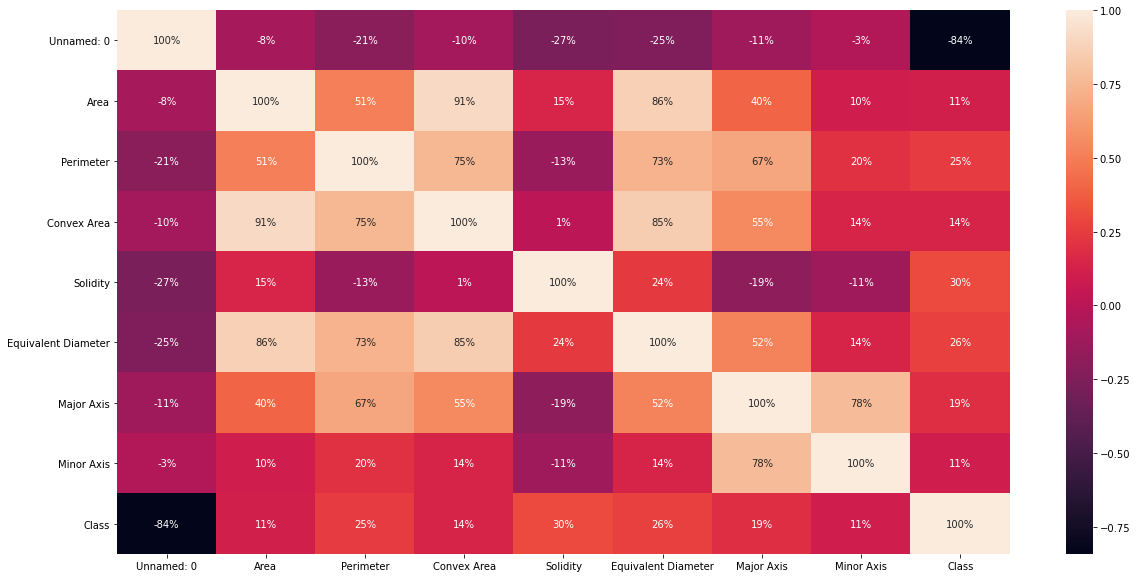

In [108]:
#Visualize the correlation 
#NOTE: To see the numbers within the cell ==>  sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')
#plt.figure(figsize=(10,10)) #This is used to change the size of the figure/ heatmap
#sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%') #Get a heap map of 11 columns, index 1-11, note index 0 is just the id column and is left out.

In [0]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:8].values 
Y = df.iloc[:, 9].values 

In [0]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.29, random_state = 0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train

In [115]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state =0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
  forest.fit(X_train, Y_train)
  
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9941520467836257
[1]K Nearest Neighbor Training Accuracy: 0.9824561403508771
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9941520467836257
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9766081871345029
[4]Gaussian Naive Bayes Training Accuracy: 0.8362573099415205
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 1.0


In [116]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

    
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)


[[27  1]
 [ 0 42]]
Model[0] Testing Accuracy = "0.9857142857142858!"

[[27  1]
 [ 1 41]]
Model[1] Testing Accuracy = "0.9714285714285714!"

[[27  1]
 [ 0 42]]
Model[2] Testing Accuracy = "0.9857142857142858!"

[[27  1]
 [ 0 42]]
Model[3] Testing Accuracy = "0.9857142857142858!"

[[26  2]
 [12 30]]
Model[4] Testing Accuracy = "0.8!"

[[28  0]
 [ 0 42]]
Model[5] Testing Accuracy = "1.0!"

[[28  0]
 [ 0 42]]
Model[6] Testing Accuracy = "1.0!"

Model  0
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        42

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.99        70
weighted avg       0.99      0.99      0.99        70

0.9857142857142858

Model  1
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        42

    accuracy              